# Otters effect on Monterey Bay

Project 1

Gail Romer and Mellie Zito

In [109]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv

#### To Do Today:
May be incomplete, but should have the QMRI structure + basic model objects defined (System, State, update function).

#### Structure:

Question: How would the populations of sea urchins and kelp have changed without the reintroduction of otters into Monterey Bay?



Parameters: birth and death rates of sea urchins and kelp in monterey bay
state (from online data table): populations of sea urchins and kelp before otter reintroduction

Also need data on the trends (birth and death rates) of sea urchin and kelp populations before otter re-introduction


In [110]:
filename = 'SeaUrchins.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M')

,Outer,Edge,Central,TOTAL
Su86,18.0,8.0,NaN,26.0
F86,13.0,9.0,2.0,24.0
W86,18.0,8.0,3.0,29.0
Sp87,17.0,7.0,3.0,27.0
Su87,16.0,6.0,4.0,26.0
F87,NaN,NaN,NaN,NaN
W87,NaN,NaN,NaN,NaN
Sp88,5.0,3.0,6.0,14.0
Su88,NaN,NaN,NaN,NaN
F88,2.0,2.0,4.0,8.0


In [111]:
outer = tables.Outer
edge = tables.Edge
central = tables.Central
total = tables.TOTAL

Su86    26.0
F86     24.0
W86     29.0
Sp87    27.0
Su87    26.0
F87      NaN
W87      NaN
Sp88    14.0
Su88     NaN
F88      8.0
W88      NaN
Sp89     NaN
Su89     4.0
Sp89     NaN
Su89     4.0
Name: TOTAL, dtype: float64

In [112]:
def plot_results(total, timeseries, title):
    """Plot the estimates and the model.
    
    total: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(total, ':', label='sea urchin pop')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Sea Urchin Population',
             title=title)

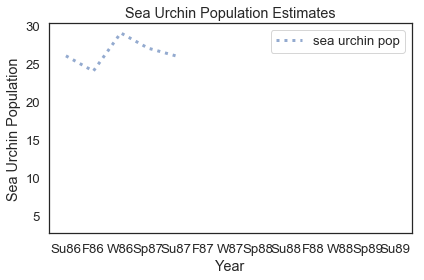

In [113]:
empty = TimeSeries()
plot_results(total, empty, 'Sea Urchin Population Estimates')

In [114]:
init = get_first_value(total)
state = State(urchins=init)

,values
urchins,26.0


In [120]:
system = System(birth_rate = .05,
                death_rate = .02,
                t_0 = 0,
                t_end = 9,
                init = init)

,values
birth_rate,0.05
death_rate,0.02
t_0,0.00
t_end,9.00
init,26.00


In [121]:
def update_func1(state, t, system):
    births = system.birth_rate * state.urchins
        
    deaths = system.death_rate * state.urchins
    
    urchins = state.urchins + births - deaths
    
    return state(urchins=urchins)

### Below Code doesn't work at the moment:

In [122]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
     
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.urchins
        
    return results

In [123]:
results = run_simulation(system, update_func1);

AttributeError: 'numpy.float64' object has no attribute 'urchins'

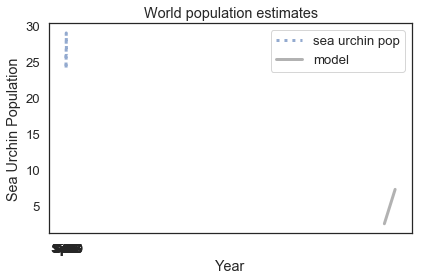

In [124]:
plot_results(total, results, 'World population estimates')

### Copied Code



#### How to take in data tables for birth and death rates and trends, then plot that data



In [48]:
filename = 'data/World_population_estimates.html'
#replace with found data table
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
plot_results(census, un, empty, 'World population estimates')

#### Then it goes into making the model:

### System objects

We can rewrite the code from the previous chapter using system objects.

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0

p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

And we can encapsulate the code that runs the model in a function.

In [ ]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

We can also encapsulate the code that plots the results.

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
results = run_simulation1(system)
plot_results(census, un, results, 'Constant growth model')

## Proportional model:

In [ ]:
def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #print(t)
    #print(pop)
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

In [ ]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                birth_rate=0.027,
                death_rate=0.01)

In [ ]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

### Combines Birth and Death Rates

In [ ]:
def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

system.death_rate = 0.01
system.birth_rate = 0.027

results = run_simulation2(system)
plot_results(census, un, results, 'Proportional model')
savefig('figs/chap03-fig03.pdf')

In [ ]:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

In [ ]:
system.alpha = system.birth_rate - system.death_rate

results = run_simulation(system, update_func2)
plot_results(census, un, results, 'Proportional model, combined birth and death')

### Multiple rates:

In [ ]:
def update_func3(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1980:
        net_growth = system.alpha1  * pop
    
    if t >= 1980:
        net_growth = system.alpha2 * pop
        
    return pop + net_growth

In [ ]:
system.death_rate1 = 0.01
system.birth_rate1 = 0.027

system.death_rate2 = 0.01
system.birth_rate2 = 0.028

system.alpha1 = system.birth_rate1 - system.death_rate1
system.alpha2 = system.birth_rate2 - system.death_rate2

results = run_simulation(system, update_func3)
plot_results(census, un, results, 'Proportional model, combined birth and death')